# Tesla (TSLA) Stock Price prediction using Facebook Prophet 

In [6]:
## Switch to GPU mode for faster Computation (Runtime> Change runtime> GPU)

## Importing all the necessary Libraries

In [7]:
#Necessary libraries = Pandas, fbprophet and plotly

#pandas= data Manipulation and analysis
#fbprophet = Forecasting
#plotly= data visualization


In [8]:
import pandas as pd
import plotly.express as px
from fbprophet import Prophet

In [9]:
 #Initializing Plotly
import plotly.io as pio
pio.renderers.default='colab'

## Importing the Dataset & Exploring it

In [10]:
df=pd.read_csv("TSLA.csv")

In [11]:
#read_csv function from pandas

In [12]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-02-22,762.640015,768.500000,710.200012,714.500000,714.500000,37269700
1,2021-02-23,662.130005,713.609985,619.000000,698.840027,698.840027,66606900
2,2021-02-24,711.849976,745.000000,694.169983,742.020020,742.020020,36767000
3,2021-02-25,726.150024,737.210022,670.580017,682.219971,682.219971,39023900
4,2021-02-26,700.000000,706.700012,659.510010,675.500000,675.500000,41089200
...,...,...,...,...,...,...,...
249,2022-02-15,900.000000,923.000000,893.380005,922.429993,922.429993,19216500
250,2022-02-16,914.049988,926.429993,901.210022,923.390015,923.390015,17098100
251,2022-02-17,913.260010,918.500000,874.099976,876.349976,876.349976,18392800
252,2022-02-18,886.000000,886.869995,837.609985,856.979980,856.979980,22710500


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       254 non-null    object 
 1   Open       254 non-null    float64
 2   High       254 non-null    float64
 3   Low        254 non-null    float64
 4   Close      254 non-null    float64
 5   Adj Close  254 non-null    float64
 6   Volume     254 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB


In [14]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,254.000000,254.000000,254.000000,254.000000,254.000000,2.540000e+02
mean,799.732914,816.860470,780.354214,798.811612,798.811612,2.699279e+07
std,175.607571,181.449103,168.641001,175.126476,175.126476,1.137801e+07
min,552.549988,566.210022,539.489990,563.000000,563.000000,9.800600e+06
25%,670.187500,684.324997,652.210007,668.179993,668.179993,1.898340e+07
50%,727.400024,741.479981,713.535003,731.569976,731.569976,2.451675e+07
75%,927.082489,945.655014,903.085022,930.937500,930.937500,3.201715e+07
max,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,8.939650e+07


# Data Visualization using plotly express- Visualizing the historical performance of Tesla

In [15]:
#Line graph, Area graph , box plot (Analyzing price and volume)

In [16]:
px.area(df,x="Date",y="Close")

In [17]:
px.line(df,x="Date",y="Close")

In [18]:
px.area(df,x="Date",y="Volume")

In [19]:
px.bar(df,y="Volume")

In [20]:
px.box(df,y="Close")

# Understanding Facebook Prophet

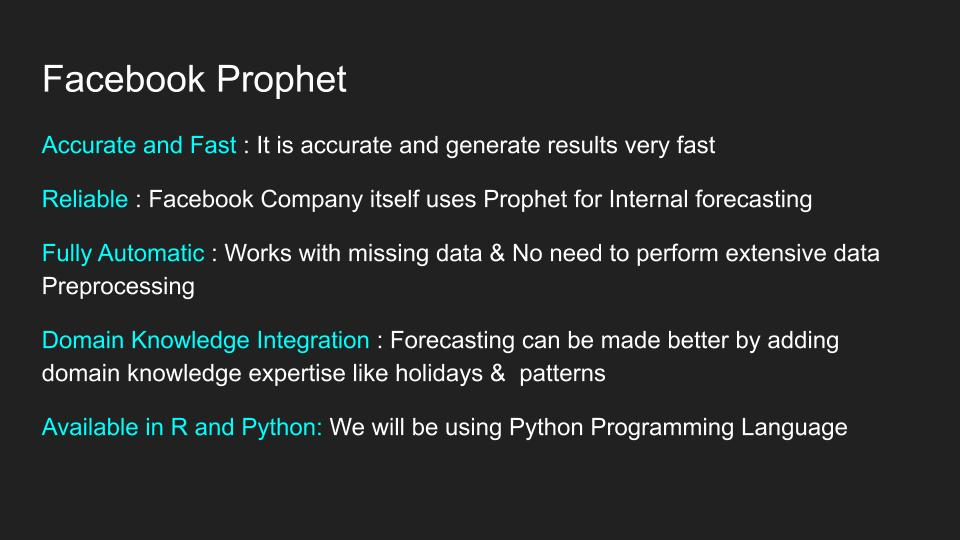

## Data Preperation

In [21]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-02-22,762.640015,768.500000,710.200012,714.500000,714.500000,37269700
1,2021-02-23,662.130005,713.609985,619.000000,698.840027,698.840027,66606900
2,2021-02-24,711.849976,745.000000,694.169983,742.020020,742.020020,36767000
3,2021-02-25,726.150024,737.210022,670.580017,682.219971,682.219971,39023900
4,2021-02-26,700.000000,706.700012,659.510010,675.500000,675.500000,41089200
...,...,...,...,...,...,...,...
249,2022-02-15,900.000000,923.000000,893.380005,922.429993,922.429993,19216500
250,2022-02-16,914.049988,926.429993,901.210022,923.390015,923.390015,17098100
251,2022-02-17,913.260010,918.500000,874.099976,876.349976,876.349976,18392800
252,2022-02-18,886.000000,886.869995,837.609985,856.979980,856.979980,22710500


In [22]:
columns =['Date','Close']
ndf=pd.DataFrame(df,columns=columns)
ndf

,Date,Close
0,2021-02-22,714.500000
1,2021-02-23,698.840027
2,2021-02-24,742.020020
3,2021-02-25,682.219971
4,2021-02-26,675.500000
...,...,...
249,2022-02-15,922.429993
250,2022-02-16,923.390015
251,2022-02-17,876.349976
252,2022-02-18,856.979980


In [23]:
prophet_df=ndf.rename(columns={'Date':'ds','Close':'y'})
prophet_df

,ds,y
0,2021-02-22,714.500000
1,2021-02-23,698.840027
2,2021-02-24,742.020020
3,2021-02-25,682.219971
4,2021-02-26,675.500000
...,...,...
249,2022-02-15,922.429993
250,2022-02-16,923.390015
251,2022-02-17,876.349976
252,2022-02-18,856.979980


## Creating Facebook Prophet Model

In [24]:
m=Prophet()
m.fit(prophet_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##Forecasting

In [25]:
future=m.make_future_dataframe(periods=30)
forecast=m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-02-22,684.919616,601.827252,763.277001,684.919616,684.919616,-1.172242,-1.172242,-1.172242,-1.172242,-1.172242,-1.172242,0.0,0.0,0.0,683.747374
1,2021-02-23,684.517066,606.538672,755.840982,684.517066,684.517066,-4.661943,-4.661943,-4.661943,-4.661943,-4.661943,-4.661943,0.0,0.0,0.0,679.855123
2,2021-02-24,684.114517,611.936526,760.732251,684.114517,684.114517,-0.999157,-0.999157,-0.999157,-0.999157,-0.999157,-0.999157,0.0,0.0,0.0,683.115359
3,2021-02-25,683.711967,596.292784,748.839541,683.711967,683.711967,-9.327065,-9.327065,-9.327065,-9.327065,-9.327065,-9.327065,0.0,0.0,0.0,674.384902
4,2021-02-26,683.309418,598.107328,745.170640,683.309418,683.309418,-11.645887,-11.645887,-11.645887,-11.645887,-11.645887,-11.645887,0.0,0.0,0.0,671.663531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,2022-03-20,854.117735,789.296683,944.035023,840.430091,868.190040,13.903147,13.903147,13.903147,13.903147,13.903147,13.903147,0.0,0.0,0.0,868.020882
280,2022-03-21,852.022445,766.603793,927.512058,837.508974,867.165840,-1.172242,-1.172242,-1.172242,-1.172242,-1.172242,-1.172242,0.0,0.0,0.0,850.850203
281,2022-03-22,849.927155,765.121514,924.332063,834.311388,866.269829,-4.661943,-4.661943,-4.661943,-4.661943,-4.661943,-4.661943,0.0,0.0,0.0,845.265212
282,2022-03-23,847.831865,765.232266,928.402720,830.977250,865.075010,-0.999157,-0.999157,-0.999157,-0.999157,-0.999157,-0.999157,0.0,0.0,0.0,846.832708


In [26]:
px.line(forecast,x='ds',y='yhat')

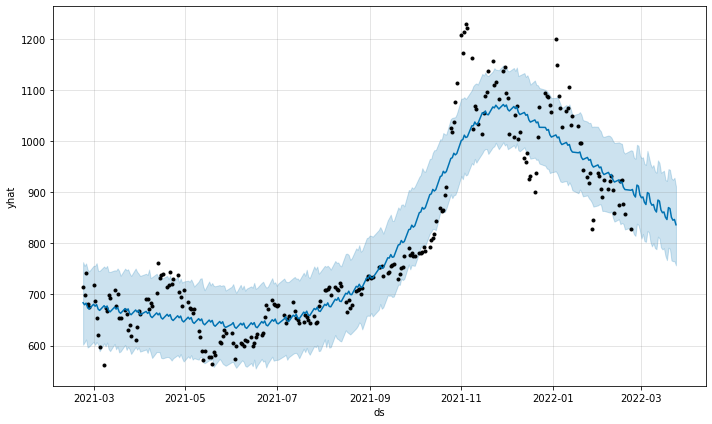

In [27]:
figure=m.plot(forecast,xlabel='ds',ylabel='yhat')

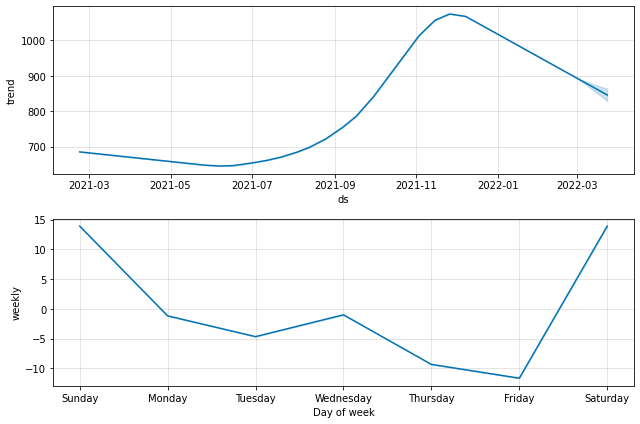

In [28]:
figure2=m.plot_components(forecast)

In [29]:
from google.colab import files
forecast.to_csv("forecast.csv")
files.download("forecast.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Downloading the Forecast data